# “A Little Bird Told Me” - Fake News, Twitter, & Society

# Overview

In this project, we sought to construct a model capable of predicting, based on twitter user data, whether a news article tweeted by that individual constituted real or fake news.  Unfortunately, none of the variables that we assessed facilitated the construction of a logistic model to make accurate predictions, though this very fact did highlight some truths about the propagation of fake news accross social networks.  Additionally, we performed a word frequency analysis on the profile descriptions of twitter users in order to obtain more information about the characteristics of individuals who disseminate fake news.  Altogether, this study proved to be rather informative.

# Names

- David Alexander
- Jason Nideffer

# Research Questions

 1) Can a model be constructed to predict, based only on twitter user information, whether or not a news story tweeted by that individual is real?  If so, what parameters are important for constructing this model? 

 2) How do individuals who tweet fake vs. real news describe themselves?  

# Hypotheses


 Adressing Question 1: We hypothesize that it is possible to build a model based on twitter user data that is capable of predicting whether a tweet from that user is fake or real news.  We think that the number of followers that users have will be an important predictor for constructing this model because it is our intuition that individuals who share fake news generally have fewer followers (because of lower credibility) than individuals who share real news.

Adressing Question 2: We hypothesize that there is a difference in the words that real and fake news tweeters use to describe themselves.  In particular, we suspect that individuals who tweet real news stories (as opposed to those who tweet fake news) more frequently describe themselves as educated and as holders of higher-paying jobs.

## Background and Prior Work

Fake news is a scourge of modern society.  Some have even likened it to a virulent strain, spreading deceit as it propagates through the innocent public [1].  Others have described it as a digital wildfire [2].  And, in fact, one study [3] has highlighted the danger of fake news by demonstrating that it targets hyper-partisan views in order to influence voting and behavioral patterns of Americans. These studies have inspired us to examine for ourselves the extent to which fake news impacts our modern society and to learn more about the communities that facilitate its dissemination.  Our approach to answering this question will use data science and modeling to analyze two dataset with real and fake news stories that have propagated throughout twitter.

In particular, we are interested in how the information that we can glean from an individual's Twitter account can help us predict whether they are a reliable source or a vector for spreading fake news.  A similar study [4] was conducted in 2013 by researchers at Rensselaer Polytechnic Institute and the University of California, Santa Barbara.  These institutions demonstrated that retweet patterns combined with user survey methods could be used to construct a model to predict the ground truth measures of tweets. This study differed slightly from ours, however.  For, where they were entirely concerned with predicting the truthfulness of tweets, we are also concerned with inferring characteristics about individuals who tweet misinformation.  Ultimately, in conducting our study, we seek to learn more about the societal environments that contribute to the spread of fake news.

#### References:
1) Andrews, Edmund. (2019). "How fake news spreads like a real virus." Stanford Engineering: Technology and Society.

https://engineering.stanford.edu/magazine/article/how-fake-news-spreads-real-virus

2) Howell, Lee. (2013). "Digital Wildfires in a Hyperconnected World." Global Risks. 

http://reports.weforum.org/global-risks-2013/risk-case-1/digital-wildfires-in-a-hyperconnected-world/?doing_wp_cron=1575920188.4150550365447998046875

3) Lee, Terry. (2019). "The global rise of “fake news” and the threat to democratic elections in the US." Public Administration and Policy. 

https://www.emerald.com/insight/content/doi/10.1108/PAP-04-2019-0008/full/html

4) Sikdar, Sujoy. (2013). "Understanding Information Credibility on Twitter." SocialCom.

https://sites.cs.ucsb.edu/~holl/pubs/Sikdar-2013-SocialCom.pdf


# Datasets

- Dataset Name: "FNN Politics Real"
- Link to the dataset: https://www.kaggle.com/antmarakis/fake-news-data#fnn_politics_real.csv
- Number of observations: 624 unique articles (142,756 tweets)


- Dataset Name: "FNN Politics Fake"
- Link to the dataset: https://www.kaggle.com/antmarakis/fake-news-data#fnn_politics_fake.csv
- Number of observations: 432 unique news articles (141,566 tweets)

Both of the above datasets contain information associated with unique news stories (fake and real).  The information provided includes: an ID number for the news story, an internet link to where it is available, the title of the story, and tweet IDs corresponding to instances when individuals tweeted these stories.  We used these tweet IDs and the Twitter API to expand our dataset to include the following data for every tweet instance: the number of favorites, the tweet ID, the number of retweets, the tweet text, the ID of the user who tweeted, the user's profile description, the total number of favorites that the user has ever received, the user's follower count, the user's friend count, the self-reported location of the twitter user, the user's screen name, and the number of statuses the user has posted.  These expanded datasets had many more observations: 142,756 for fake news tweets and 141,566 tweets for real news tweets.

Ultimately, we combined these real and fake news datasets to make a single dataset (284,322 rows × 7 columns after cleaning).  True news tweets were asigned a value of 1 in the 'truth' column of the combined dataset, while fake news tweets were assigned a value of 0.  This facillitated logistic regression analyses.

# Setup

In order to perform this analysis we utilized tools from matplotlib, wordcloud, pandas, numpy, statsmodels, pickle, string, and random.

In [67]:
# Import libraries
import csv                                  # used for parsing the kaggle datasets
import tweepy                               # client for Twitter API use
import matplotlib.pyplot as plt             # plt is for making plots, graphs, and figures
import matplotlib.colors as colors          # colors allows us to color plot intuitively
import matplotlib.cm as cm                  # cm allows us to color plot intuitively
from wordcloud import WordCloud             # WordCloud provides word clouds for data visualization

import pandas as pd                         # pd helps organize data structures
import numpy as np                          # np provides mathematical functions like sqrt()
import scipy.stats as stats                 # stats provides tests for normal distributions
import statsmodels.formula.api as sm        # sm provides logistic regression

import pickle                               # pickle allows us to access datasets saved in .pkl files
import string                               # string profides tools for data cleaning
import random                               # random allows us to randomly sample our dataset


### Obtaining the tweet and user data

Twitter allows anyone with a Twitter developer account to pull tweet and (public) user data, so long as the purpose is approved by Twitter. We can grab the data associated with any tweet (along with the public data of the user that posted it) if we have the tweet ID of the tweet. Since we're only interested in the tweet IDs from our fake and real news datasets, we first must gather all the tweet IDs (for fake and real) by placing them in lists. Then we can go about actually fetching the tweets.

In [ ]:
tweetIds_fake = []
with open('fnn_politics_fake.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    line_counter = 0
    for row in csv_reader:
        if line_counter == 0:
            print("Columns are " + str(row))
            line_counter += 1
        else:
            tweets_string = row[3]
            tweetIdList = tweets_string.split('\t')
            for id in tweetIdList:
                tweetIds.append(id)

Now we make a list of the tweets that posted real news.

In [ ]:
tweetIds_real = []
with open('fnn_politics_real.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    line_counter = 0
    for row in csv_reader:
        if line_counter == 0:
            print("Columns are " + str(row))
            line_counter += 1
        else:
            tweets_string = row[3]
            tweetIdList = tweets_string.split('\t')
            for id in tweetIdList:
                tweetIds_real.append(id)

Now that we have our tweet IDs, we can use the Twitter API (through Tweepy, a python client) to grab the tweets. Each API call will a return a Status object. The Status object contains both data regarding the tweet, along with the associated user's data.

Twitter API allows us to grab tweet objects (also referred to as statuses) in batches of 100 at a time. There are 165392 tweets, so we will grab tweets 100 at a time. Tweet objects contain a LOT of data, many attributes. Each tweet will be turned into a dict that contains only the data we want. Each tweet object contains the user data of who posted it, so we will do the same with users. We are going to analyze the frequency of words that fake news users and real news users use to describe themselves (we will put this in dicts also) 

#### Important note: Below, most of the code is commented. This is because we do not recommend running the tweet/user data fetching processes. Due to the large amount of tweets, and the rate limit enforced by twitter, the entire process of just getting the Status objects can take 30+ minutes. The first uncommented unpickling stored dataframes, which were made by running the commented code. We recommend resuming running on the unpickling, and go from there.

In [ ]:
# startIndex = 0
# endIndex = 100

# tweetDicts_fake = []
# userDictsDict_fake = {}
# descDict_fake = {}   # Dictionary of user IDs and their account description
# tweetDicts_real = []
# userDictsDict_real = {}
# descDict_real = {}

Function: breakdownTweet(Status object: tweetObj) Goal: Extract only the data we want from the tweet objects, a dict for the tweet data, a dict for the user data. Returns: A list containing 2 dicts: [tweetData, userData]

In [ ]:
# def breakdownTweet(tweetObj):
#     tweetDict = tweetObj.__dict__	# Need the dict form of status object

#     # Take only what we want for each tweet
#     tweet = {}
#     tweet['id_str'] = tweetDict['id_str']
#     tweet['text'] = tweetDict['text']
#     tweet['retweet_count'] = tweetDict['retweet_count']
#     tweet['favorite_count'] = tweetDict['favorite_count']
#     tweet['user_id'] = tweetDict['user']._json['id_str']

#     # Take only what we want for each user
#     user = {}
#     user['id_str'] = tweetDict['user']._json['id_str']
#     user['screen_name'] = tweetDict['user']._json['screen_name']
#     user['description'] = tweetDict['user']._json['description']
#     user['followers_count'] = tweetDict['user']._json['followers_count']
#     user['friends_count'] = tweetDict['user']._json['friends_count']
#     user['statuses_count'] = tweetDict['user']._json['statuses_count']
#     user['location'] = tweetDict['user']._json['location']
#     user['favourites_count'] = tweetDict['user']._json['favourites_count']
#     return [tweet, user]

Getting the tweets, user data, and building the description dictionaries.

In [ ]:
# while endIndex < len(tweetIds):
#     tweet_obj_list_fk = api.statuses_lookup(tweetIds_fake[startIndex:endIndex])  # Gets batch of 100 status objects
#     for tweetObject in tweet_obj_list:
#         tweetUserPair = breakdownTweet(tweetObject)

#         tweet = tweetUserPair[0]
#         user = tweetUserPair[1]
#         tweetDicts_fake.append(tweet)
#         userDictsDict_fake[user['id_str']] = user

        
#     # Set indices for next batch
#     startIndex = endIndex
#     endIndex += 100


#     # Get the last batch, the remainder of less than 100 tweets
#     if endIndex > len(tweetIds) -1:       
#         tweet_obj_list = api.statuses_lookup(tweetIds_fake[startIndex:])
#         for tweetObject in tweet_obj_list:
#             tweetUserPair = breakdownTweet(tweetObject)
#             tweet = tweetUserPair[0]
#             user = tweetUserPair[1]
#             tweetDicts_fake.append(tweet)
#             userDictsDict_fake[user['id_str']] = user

Repeat for real news users

In [ ]:
# startIndex = 0
# endIndex = 100
# while endIndex < len(tweetIds):
#     tweet_obj_list = api.statuses_lookup(tweetIds_real[startIndex:endIndex])  # Gets batch of 100 status objects
#     for tweetObject in tweet_obj_list:
#         tweetUserPair = breakdownTweet(tweetObject)

#         tweet = tweetUserPair[0]
#         user = tweetUserPair[1]
#         tweetDicts_real.append(tweet)
#         userDictsDict_real[user['id_str']] = user

       
#     # Set indices for next batch
#     startIndex = endIndex
#     endIndex += 100


#     # Get the last batch, the remainder of less than 100 tweets
#     if endIndex > len(tweetIds) -1:       
#         tweet_obj_list = api.statuses_lookup(tweetIds[startIndex:])
#         for tweetObject in tweet_obj_list:
#             tweetUserPair = breakdownTweet(tweetObject)
#             tweet = tweetUserPair[0]
#             user = tweetUserPair[1]
#             tweetDicts_real.append(tweet)
#             userDictsDict_real[user['id_str']] = user

Now we can convert our large dictionaries into dataframes

In [ ]:
# tweetDf_fake = pd.DataFrame(tweetDicts_fake)
# userDf_fake = pd.DataFrame(userDictsDict_fake)
# tweetDf_real = pd.DataFrame(tweetDicts_real)
# userDf_real = pd.DataFrame(userDictsDict_real)

# # So that the indexing is according to user ID
# userDf_fake = userDf_fake.transpose()
# userDf_real = userDf_real.transpose()

Pickling the files, done so we could share the data with each otherr, and not have to run the tweet fetching again

In [ ]:
# fileObject = open("tweets_users_descFreq_FAKE.pickle",'wb')
# objs_fake = [tweetDf_fake, userDf_fake]
# pickle.dump(objs_fake,fileObject)  
# fileObject.close()

In [ ]:
# fileObject = open("tweets_users_descFreq_REAL.pickle",'wb')
# objs_real = [tweetDf_real, userDf_real]
# pickle.dump(objs_real,fileObject)  
# fileObject.close()

Unpickling.

In [2]:
# Obtaining Twitter Data
fake_pickle = pickle.load(open("tweets_users_descFreq_FAKE.pickle", "rb"))
real_pickle = pickle.load(open("tweets_users_descFreq_REAL.pickle", "rb"))

Each of these .pkl files contains a list with two dataframes and one series.  These data were loaded and stored in the jupyter notebook namespace as shown below:

In [3]:
# Obtaining Twitter datasets
# Fake News
fake_tweet_df = fake_pickle[0]
fake_user_df = fake_pickle[1]


#Real News
real_tweet_df = real_pickle[0]
real_user_df = real_pickle[1]


# Data Cleaning

Three different data preparations were made for different applications.  The first was conducted in order to facilitate a logistic regression analysis.  

### Data Cleaning for Logistic Regression

The first in cleaning the data for logistic regression was to associate user data (ie. number of favorites, number of followers, number of statuses, etc.) with each tweet observation.  This was performed for the fake news and real news datasets (still separate).  Next, the fake news and real news tweets had to be labeled as such (this is the variable we attempted to predict), so a new column called 'truth' was added to each dataset, and a 1 was assigned to real news tweets, while a 0 was assigned to fake news tweets.  Once this was complete, the datasets could be merged to form a single dataset with both fake news and real news tweets.  Lastly, superfluous columns were dropped from the dataset.  These included: tweet ID, tweet text, user description, user location, user ID, and screen name (though some of these dropped variables were used in subsequent analyses).  Notably, this dataset did not require very much cleaning before we were able to perform logistic regression.  This is because the numerical variables which we employed were not human entries but rather standardized statistics provided by Twitter's API.

In [4]:
# Combining dataframes, associating user data with tweet data
# Fake News
ids = fake_user_df.index
fake_user_df.insert(0, "user_id", ids, True)
comb_fake_df = pd.merge(fake_tweet_df, fake_user_df, on = 'user_id', how = 'left')

#Real News
ids = real_user_df.index
real_user_df.insert(0, "user_id", ids, True)
comb_real_df = pd.merge(real_tweet_df, real_user_df, on = 'user_id', how = 'left')

In [5]:
# Adding Fake/Real Variable (0 = Fake; 1 = True)
# Fake News
comb_fake_df.insert(13, "truth", [0] * (len(comb_fake_df)), True)

# Real News
comb_real_df.insert(13, "truth", [1] * (len(comb_real_df)), True)

In [6]:
# Combining Real and Fake News dataframes
df = pd.concat([comb_fake_df, comb_real_df])

In [7]:
# Dropping irrelevant Columns
# 'df' is the dataframe to be used for logistic regression
df = df.drop(columns=['id_str_x',
                      'text', 
                      'description', 
                      'id_str_y', 
                      'location',
                      'user_id',
                      'screen_name'])

### Data Cleaning for Frequency Analysis (For Word Clouds)

The second application for which we had to prepare and clean data was for determining the words that fake news tweeters and real news tweeters frequently use to describe themselves (visualized with a word cloud).  For this analysis, we isolated the profile descriptions provided by each twitter user in our fake and real news datasets.  First, we dropped those observations that did not have profile descriptions.  Next, we sequentially lowered the case of and removed punctuation from each description.  Following which, we iterated through each word in every user's description (which were all split using a space: ' ').  When a new word was encountered, it was added to a dictionary such that dictionary[word] = 1, and each subsequent encounter with that word would increase by 1 the dictionary value associated with that word.  This allowed us to count the total number of times a word was used in all the profile descriptions of people who tweeted fake news and people who tweeted real news (separately).  Each dictionary was converted into a series and sorted from hightet value to lowest value.  Notably, this data did not have to be very clean (in fact, it contained many non-alphanumeric "words" and words in foreign languages) because the nature of our analysis was such that only words that appeared at high frequencies would be reported.

In [8]:
# Lists for frequency analysis
# Fake News
desc_fake_df = fake_user_df.description

# Dropping instances where no input was provided
desc_fake_df = desc_fake_df[desc_fake_df != '']

# Real News
desc_real_df = real_user_df.description

# Dropping instances where no input was provided
desc_real_df = desc_real_df[desc_real_df != '']

"""
Making dictionaries to count the number of times a word is used in the descriptions
of Twitter users who perpetuate fake or real news.
"""

dicts_list = []

for dataset in [desc_fake_df, desc_real_df]:
    
    desc_dict = {}        

    for desc in dataset:
        desc = desc.lower()
        desc = desc.translate(str.maketrans('', '', string.punctuation))
    
        words = [word.strip() for word in desc.split(' ')]
    
        for word in words:
            if word != '':
                if word in desc_dict:
                    desc_dict[word] += 1
                else:
                    desc_dict[word] = 1
      
    dicts_list.append(desc_dict)

In [9]:
# Fake News
fake_desc_series = pd.Series(dicts_list[0])
fake_desc_series = fake_desc_series.sort_values(ascending = False)

# Real News
real_desc_series = pd.Series(dicts_list[1])
real_desc_series = real_desc_series.sort_values(ascending = False)

### Data Cleaning for Frequency Analysis (For Word Spectrum)

The third and final application for which we cleaned data was to perform a frequency analysis as hinted at above; however, our goal in this case was to construct a word spectrum rather than a word cloud.  Because of the nature of word spectrum construction, we had to do more data cleaning than was performed to prepare the data for word cloud construction.  First, we took the series made in the cell above, and we removed words that appeared in descriptions at a frequency of 10 or lower.  Then we merged the series associated with the profile descrtiptions of fake news and real news tweeters in order to form a single dataframe.  Then the values in this dataframe were normalized (ie. counts for each word in the profile descriptions of fake news tweeters were divided by the total number of words across all the profile descriptions of fake news tweeters; the same was done for word counts associated with real news tweeters).  Then, a dictionary was created that contained for each word (the dictionary key) an associated ratio of usage by fake news tweeters to usage by real news tweeters.  Finally, words were dropped from this dictionary if they contained fewer than three letters or if they contained any characters that were not alphanumeric.

In [10]:
# Removing very infrequently used words
fake_desc_series = fake_desc_series[fake_desc_series > 10]
real_desc_series = real_desc_series[real_desc_series > 10]

# Constructing an aligned dataframe for Fake and Real Values
fake_desc_df = pd.DataFrame(fake_desc_series)
real_desc_df = pd.DataFrame(real_desc_series)

spec_df = fake_desc_df.merge(real_desc_df, left_index=True, right_index=True)

spec_df.columns = ['fake', 'real']

In [11]:
## Obtaining ratios of word usage to compare frequency among fake and real news tweeters
fr_ratios_dict = {}

# Values for normalization (total number of words used by fake and real news tweeters)
count_fake = sum(fake_desc_series)
count_real = sum(real_desc_series)

for word, fake, real in zip(spec_df.index, spec_df.fake, spec_df.real):
   
    # Normalizing for differences in number of words used in descriptions of fake and real news tweeters
    normed_fake = fake / count_fake
    normed_real = real / count_real
    
    fr_ratios_dict[word] = normed_fake / normed_real # Key = word; value = ratio (fake to real)

In [12]:
# Removing one and two-letter words
fr_ratios_dict = {k:v for k,v in fr_ratios_dict.items() if len(k) > 2}

# Removing non alphanumerics
fr_ratios_dict = {k:v for k,v in fr_ratios_dict.items() if k.isalnum()}

# Data Analysis & Results

### Exploratory Data Analysis

Initially, we decided to visualize the distributions of the variables in our dataset.

<Figure size 720x360 with 0 Axes>

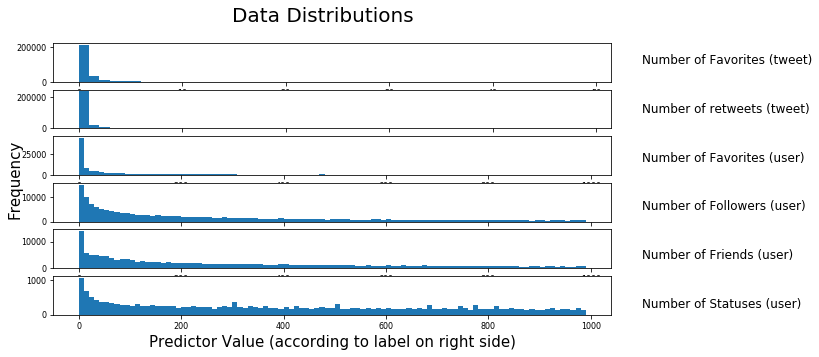

In [151]:
# Plotting Data Distributions
plt.figure()
plt.rc('font', size= 8)
plt.rcParams['figure.figsize'] = [10, 5]

fig, axs = plt.subplots(6)
fig.suptitle('Data Distributions', fontsize=20)

axs[0].hist(list(df.favorite_count), bins=list(range(0, 50, 1)))
axs[1].hist(list(df.retweet_count), bins=list(range(0, 50, 1)))
axs[2].hist(list(df.favourites_count), bins=list(range(0, 1000, 10)))
axs[3].hist(list(df.followers_count), bins=list(range(0, 1000, 10)))
axs[4].hist(list(df.friends_count), bins=list(range(0, 1000, 10)))
axs[5].hist(list(df.statuses_count), bins=list(range(0, 1000, 10)))

plt.text(1100, 7200, 'Number of Favorites (tweet)', fontsize=12)
plt.text(1100, 5800, 'Number of retweets (tweet)', fontsize=12)
plt.text(1100, 4400, 'Number of Favorites (user)', fontsize=12)
plt.text(1100, 3000, 'Number of Followers (user)', fontsize=12)
plt.text(1100, 1600, 'Number of Friends (user)', fontsize=12)
plt.text(1100, 200, 'Number of Statuses (user)', fontsize=12)

plt.ylabel('Frequency', fontsize=15, position=(0,3.5))
plt.xlabel('Predictor Value (according to label on right side)', fontsize=15)

plt.show()


Histograms above demonstrate that these distributions are not normal but rather, highly skewed.  The variables associated with the tweets and users for which we have data are mostly clustered around lower values.  This will not affect our analysis, however, because logistic regression does not assume any sort of data distribution.

### Logistic Regression

Because our cleaned dataset has 6 predictors and a categorical response variable (which we are attempting to predict) we decided that a logistic regression would be the most effective type of model for our analysis.  Thus, we performed logistic regression to fit 1,000 models for each of our 6 predictor variables using random samplings of our observations (n = 5,686).  We then used each of the 1,000 models corresponding with each predictor to obtain average values for each of the six parameters, the p-values of which are described in the table below.

In [123]:
# Logistic Regression

# Obtaining P-values for every predictor
average_p_dict = {}

for predictor in df.columns[0:-1]:
    
    p_list = []
    
    for iteration in range(1000):
        sample = df.sample(frac = .02)
 
        sample = pd.DataFrame({predictor: list(sample[predictor]), 'truth': list(sample.truth)})
    
        formula = 'truth ~ ' + predictor + ' + 1'
    
        model = sm.logit(formula = formula, data = sample)

        results = model.fit(disp=0)
        p_list.append(results.pvalues[1])
        
    average_p = np.average(p_list)
    
    average_p_dict[predictor] = average_p
    

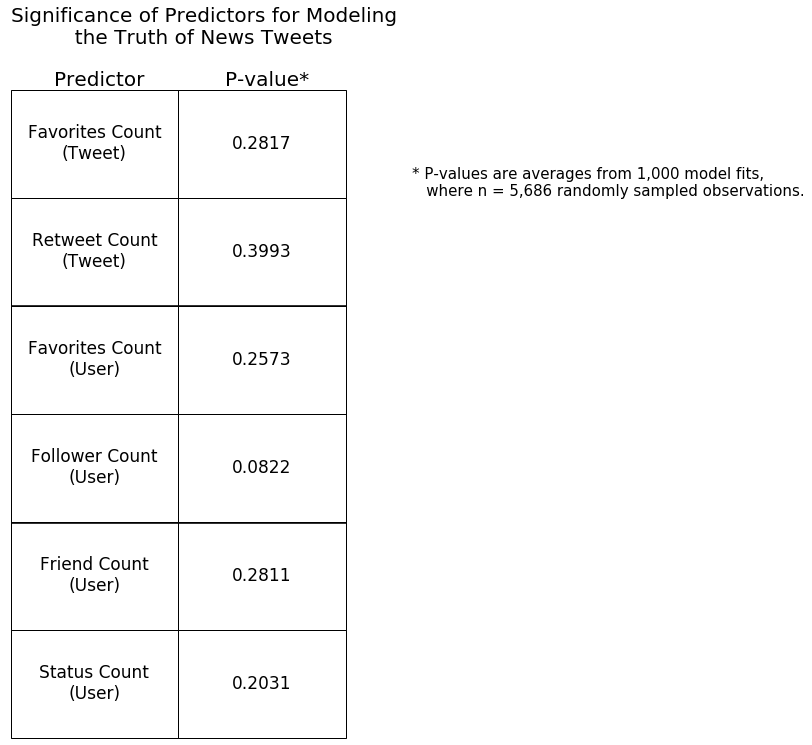

In [124]:
# Plotting P-values

p = average_p_dict

p_data = [['Favorites Count\n(Tweet)', str(p['favorite_count'])[0:6]],
          ['Retweet Count\n(Tweet)', str(p['retweet_count'])[0:6]],
          ['Favorites Count\n(User)', str(p['favourites_count'])[0:6]],
          ['Follower Count\n(User)', str(p['followers_count'])[0:6]],
          ['Friend Count\n(User)', str(p['friends_count'])[0:6]],
          ['Status Count\n(User)', str(p['statuses_count'])[0:6]]]
         

fig, ax = plt.subplots()

p_table = plt.table(cellText = p_data, loc=(0,0), cellLoc = 'center')

p_table.set_fontsize(34)
p_table.scale(1, 9)

plt.setp(ax.get_xticklines(), visible=False)
plt.setp(ax.get_yticklines(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

p_label = plt.text(0.64, 2.01, 'P-value*', fontsize=20)
pred_label = plt.text(0.13, 2.01, 'Predictor', fontsize=20)

note = plt.text(1.2, 
                1.5, 
                '* P-values are averages from 1,000 model fits,\n   where n = 5,686 randomly sampled observations.', 
                fontsize=15)

title = plt.text(0, 2.2, 
                 'Significance of Predictors for Modeling\n          the Truth of News Tweets', 
                 fontsize=20)



Based on the p-values in the table above, none of our six predictor variables could be used to accurately predict whether a tweet contained fake or real news.  The predictor with the lowest p-value was a user's follower count (p-value = approx. 0.08).  A logistic model constructed using this predictor is fit in the graph below.

Optimization terminated successfully.
         Current function value: 0.692136
         Iterations 7


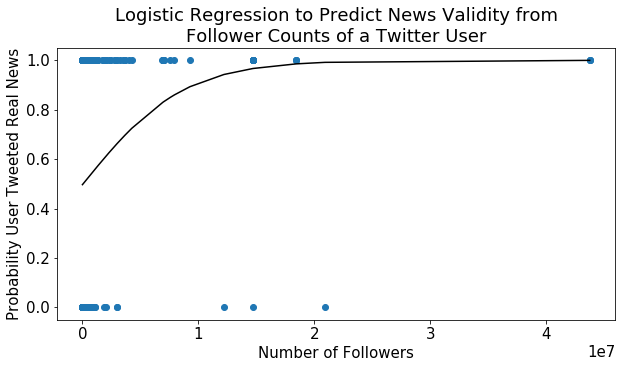

In [152]:
# Defining sample to model
sample = df.sample(frac = 0.05)
sample = pd.DataFrame({'followers_count': list(sample.followers_count), 'truth': list(sample.truth)})


# Plotting Logistic Regression with 'followers_count'
plt.figure()
plt.rc('font', size= 15)
plt.rcParams['figure.figsize'] = [10, 5]

model = sm.logit(formula = 'truth ~ followers_count + 1', data = sample)

results = model.fit()

plt.plot(sample.followers_count, sample.truth, "o")

followers_count = sample.followers_count
followers_count = pd.DataFrame(followers_count)

followers_count = followers_count.sort_values(by = ['followers_count'])

plt.plot(followers_count, results.predict(exog = followers_count), 'k')

plt.ylabel('Probability User Tweeted Real News')
plt.xlabel('Number of Followers')

plt.title('Logistic Regression to Predict News Validity from\nFollower Counts of a Twitter User')

plt.show()

The fit above does not show a complete sigmoid curve as a proper logistic regression should.  This is a testament to our inability to use the number of followers of a given twitter user (or any other tested variable) to accurately predict whether the news tweeted by that user was real or fake.  This fact suggests that our first hypothesis was wrong, and the implications of this finding are discussed further in the "Conclusion & Discussion."

### Word Frequency Analysis of Tweeters of Fake and Real News

Next we tested our hypothesis that there is a difference in the words that real and fake news tweeters use to describe themselves.  To do this, we wrote an algorithm (below) to identify the 50 most commonly used words in the profile descriptions of fake news tweeters that are not among the 50 most commonly used words in the profile descriptions of real news tweeters (the reverse was also done).  

In [153]:
unique = False

while unique == False:
    
    drop_list = []
    same = 0
    
    for word in fake_desc_series.index[0:50]:
        if word in real_desc_series.index[0:50]:
            drop_list.append(word)
            same += 1
    
    fake_desc_series = fake_desc_series.drop(drop_list)
    real_desc_series = real_desc_series.drop(drop_list)
            
    if same == 0:
        unique = True
        
        

The results of the algorithm above are represented in two word clouds constructed below.

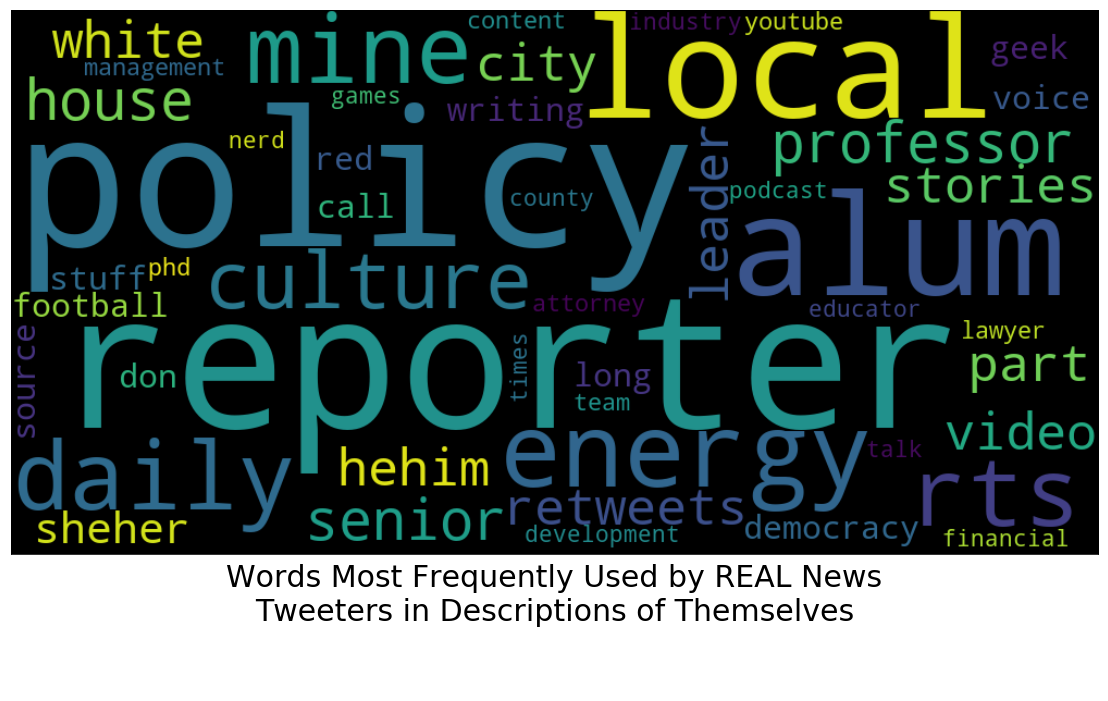

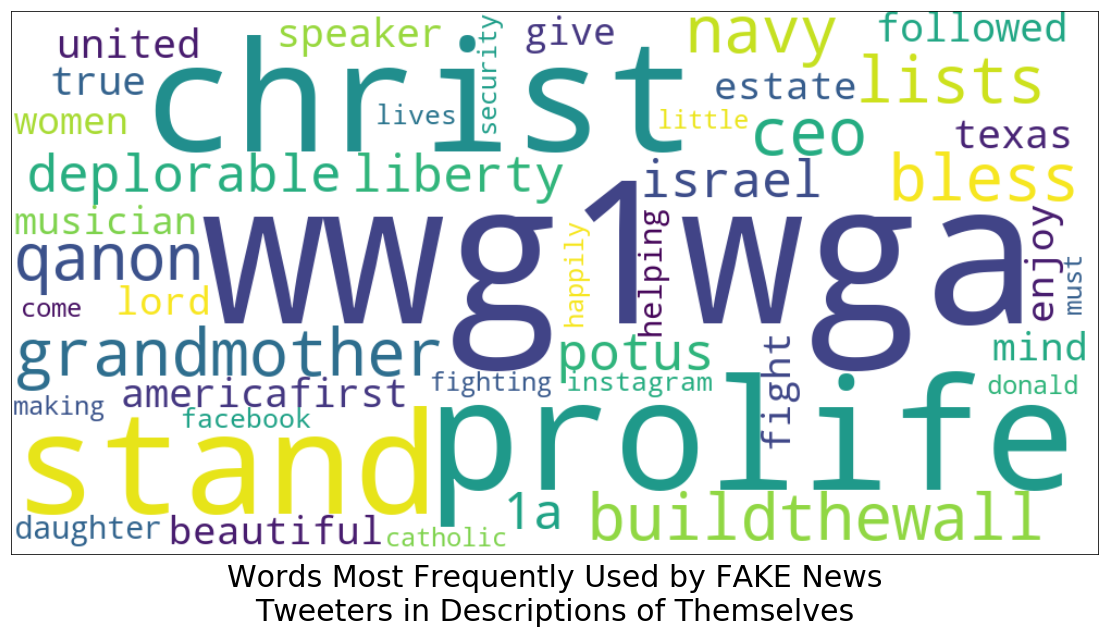

In [156]:
# Plotting Parameters
plt.figure()
plt.rc('font', size= 30)
plt.rcParams['figure.figsize'] = [20, 10]


# Constructing Fake News Wordcloud
string_fake = ''

for word in fake_desc_series.index[0:50]:
    string_fake += word + ' '
    
wordcloud_fake = WordCloud(width = 1000, height = 500, background_color='white').generate(string_fake)


# Constructing Real News Wordcloud
string_real = ''

for word in real_desc_series.index[0:50]:
    string_real += word + ' '
    
wordcloud_real = WordCloud(width = 1000, height = 500).generate(string_real)


#Plotting Real News Wordcloud
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, 
                labelbottom=False, labelleft=False)
plt.xlabel("Words Most Frequently Used by REAL News\nTweeters in Descriptions of Themselves\n\n", labelpad = 10)
plt.show()

#Plotting Fake News Wordcloud
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, 
                labelbottom=False, labelleft=False)
plt.xlabel("Words Most Frequently Used by FAKE News\nTweeters in Descriptions of Themselves", labelpad = 10)
plt.show()

Looking at the word clouds above, we can immediately see differences between the words used in profile descriptions by fake news tweeters and real news tweeters.  These results speak to the second part of our hypothesis, which stated that individuals who tweet real news (as opposed to fake news) more frequently describe themselves as educated and as individuals with higher paying jobs.  And, in fact, in the word cloud associated with real news tweeters, we see words such as "alum," "reporter," "professor," "management," "nerd," "geek," "financial," "lawyer," "leader," "attorney," "industry," and "phd."  The word cloud associated with fake news tweeters does not include as many words related to education or high paying jobs - only "speaker" and "ceo."  These data support our second hypothesis.

Note that larger words are more frequently used in twitter profile descriptions, but their size is not directly proportional to their frequency of use, as even the smaller words are used frequently compared to other words in our dataset.

### Experimenting with Other Datavisualization Methods

We decided that, while a word cloud does tell us a substantial amount of information, there may be a more informative way to visualize these data.  Thus, we experimented with creating a word spectrum, where words are plotted along a horizontal axis according to whether they more frequently occur in the descriptions of twitter users who share real news (left) or twitter users who share fake news (right).  To help with this visualizations, the further a word is to the left, the more blue it appears and the further that a word is to the right, the more red it appears.  Additionally, word size is proportional to the frequency with which words are used.

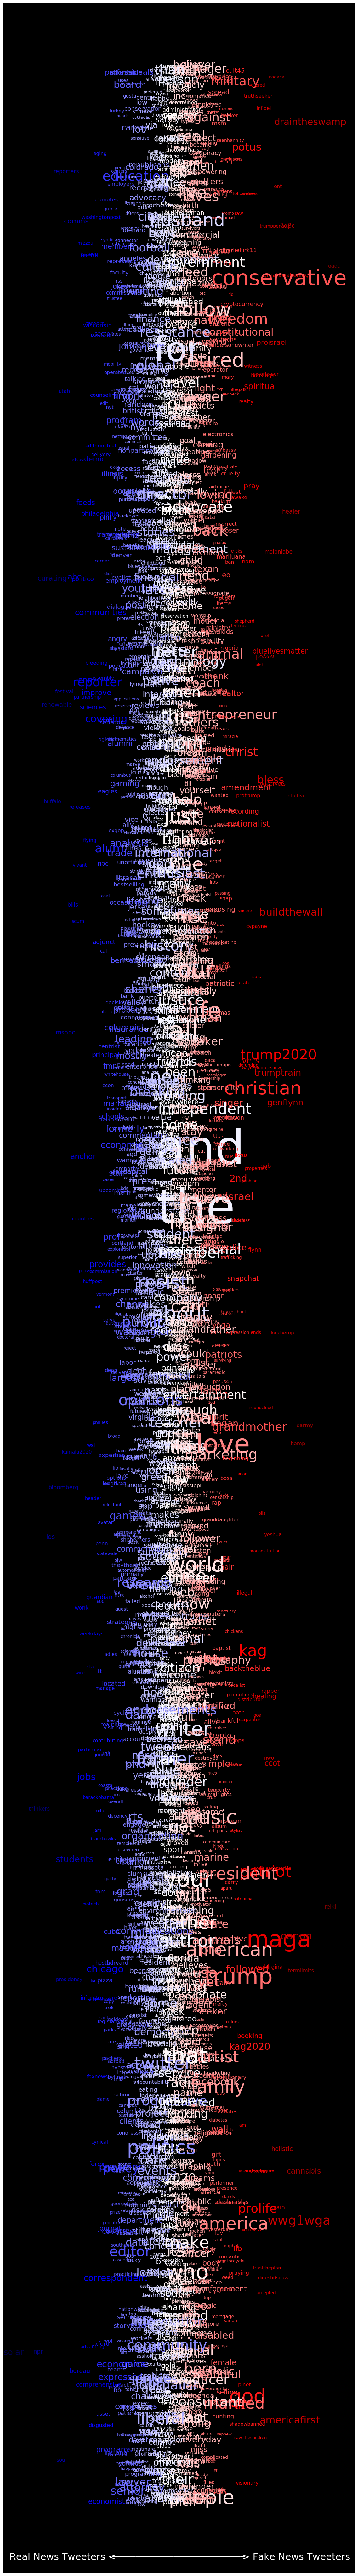

In [181]:
plt.figure()

plt.rc('font', size=20)
plt.rcParams['figure.figsize'] = [20, 150]
plt.rcParams['axes.facecolor'] = 'black'
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, 
                labelbottom=False, labelleft=False)

plt.ylim(top=10000, bottom=-10000)
plt.xlim(left=-3.1, right=2.7)

plt.text(-3, -9900, 'Real News Tweeters <                                          > Fake News Tweeters', fontsize=30, color='white')
plt.text(-1.31, -9860, '____________________________', fontsize=30, color='white')

sample = dict(random.sample(fr_ratios_dict.items(), 4000))

norm = colors.Normalize(-3, 2)
    
texts = [plt.text(
                np.log2(fr_ratios_dict[word] * 100) - np.log2(100) - 0.5, 
                random.uniform(-9500, 9500), 
                word, 
                fontsize = np.cbrt(sum(spec_df.loc[word]))*4,
                color = cm.seismic(norm(np.log2(fr_ratios_dict[word] * 100) - np.log2(100) - 0.5))
                ) for word in sample]

plt.show()

The results depicted by our word spectrum demonstrate (in agreement with the word clouds) that our second hypothesis was correct - individuals who tweet real news as opposed to fake news appear to describe themselves as more educated and seem to have higher paying jobs.  In addition to this, it appears as though the line dividing tweeters of fake news and tweeters of real news may coincides with the line that divides individuals with conservative and liberal political ideologies.  For, many of the words that appear more on the "fake news side" are associated with the republican party: "military," "draintheswamp," "family," "nodaca," "conservative," "freedom," "bluelivesmatter," "nationalist," "buildthewall," "trump," "maga," and "god."  Moreover, many of the words that appear on the real news side are associated with the democratic party: "impeachtrump," "ucla," "students," "kamala2022," "bernie202," "renewable," "politico," "education," "she/her," and "he/him."  This interesting result is discussed further in the "Conclusion & Discussion."

# Ethics & Privacy

The dataset that we used was available to the public domain through Kaggle.  Additionally, we had permission from Twitter to use tweet IDs in the Kaggle dataset to obtain data on users and their tweets.  We did not have permission from Twitter users to utilize their information, but this is unnecessary because of a clause written into Twitter's terms of service.  That being said, we were restricted with what information we could publicize.  Moreover, the dataset that we analyzed included the Twitter usernames and, in some cases, names of individuals who tweeted real and fake news - this information was not used in our analysis and was removed from the dataset early in the cleaning process.  The data that we utilized was not sensitive and was not analyzed in the context of personal user information.

We are concerned that our dataset is biased.  For, its constructor had to deem what news was "real" and what news was "fake."  Additionally, based on our analysis results, which seem to demonstrate an association between republicans and fake news, we are concerned that the constructor of our dataset may have predominantly included fake news stories published by right-leaning sources and excluded those published by left-leaning sources.  Without looking specifically at the content of the fake news stories, we cannot know this, but were we to conduct further analyses with these data, this would be an important factor to investigate.  This issue was only discovered late in our analysis and, thus, could not be solved.  However, the potential bias of our dataset does not invalidate all of our findings.